In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('train.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Understanding the Dataset

In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Visualize Class Distribution

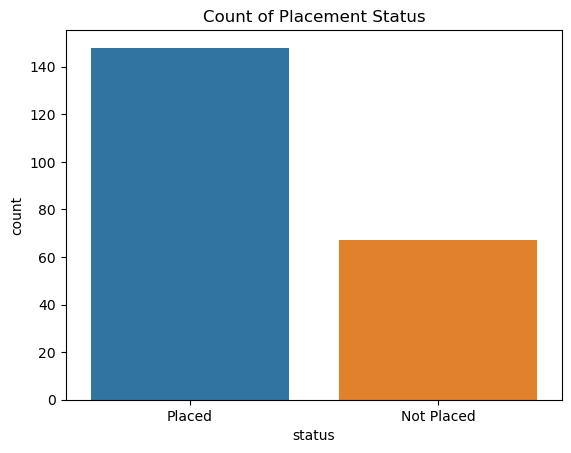

status
Placed        68.837209
Not Placed    31.162791
Name: proportion, dtype: float64


In [7]:
# Count plot of placement status
sns.countplot(x='status', data=df)
plt.title('Count of Placement Status')
plt.show()

# Display class distribution in percentages
status_counts = df['status'].value_counts(normalize=True) * 100
print(status_counts)

# Visualize Categorical Variables

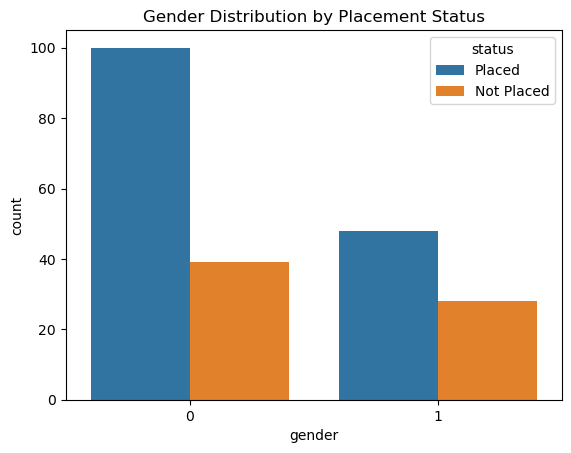

In [8]:
# Gender distribution
sns.countplot(x='gender', hue='status', data=df)
plt.title('Gender Distribution by Placement Status')
plt.show()

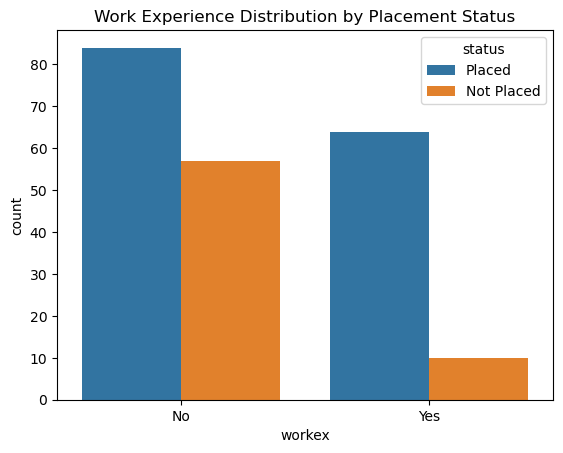

In [9]:
# Work experience distribution
sns.countplot(x='workex', hue='status', data=df)
plt.title('Work Experience Distribution by Placement Status')
plt.show()

# Visualize Numerical Variables

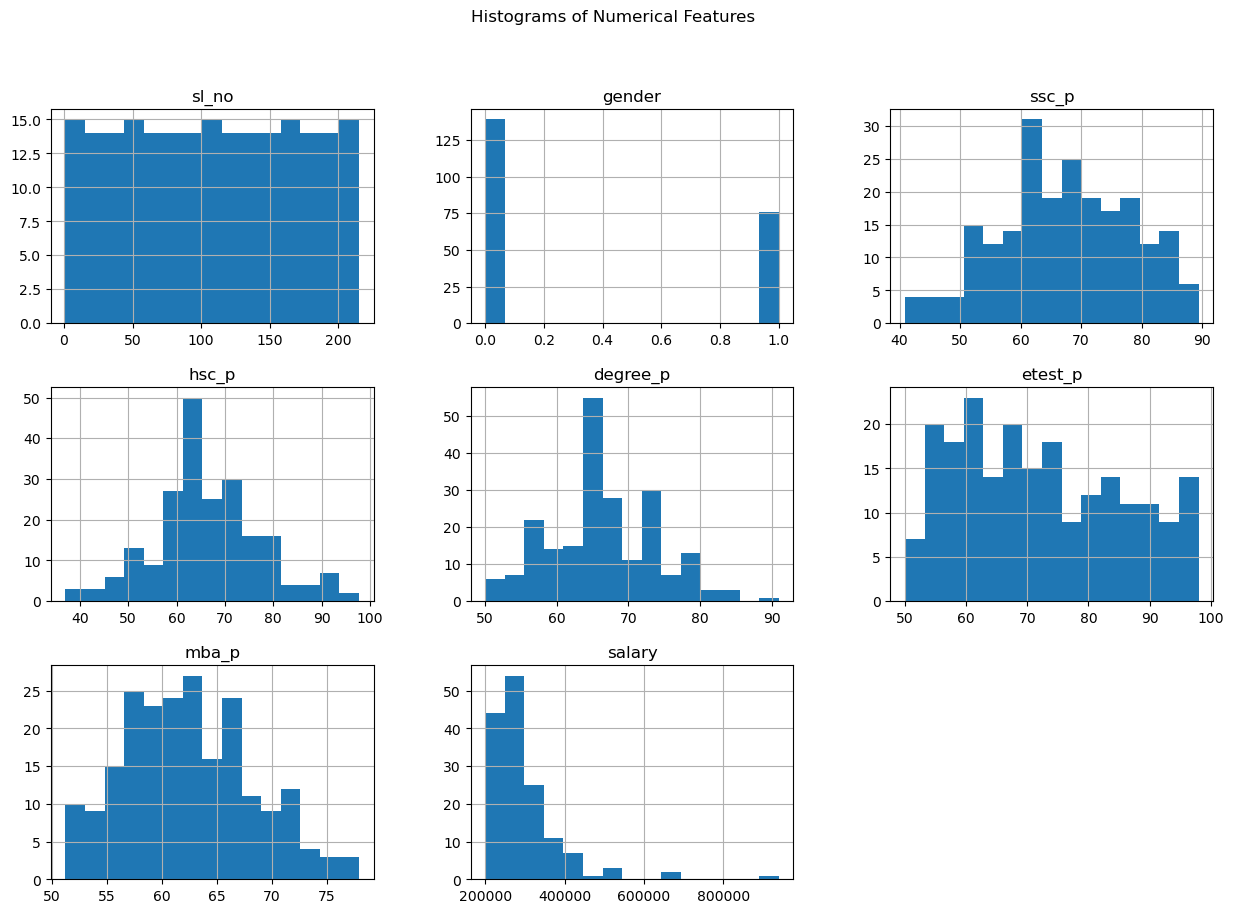

In [10]:
# Histograms of numeric features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

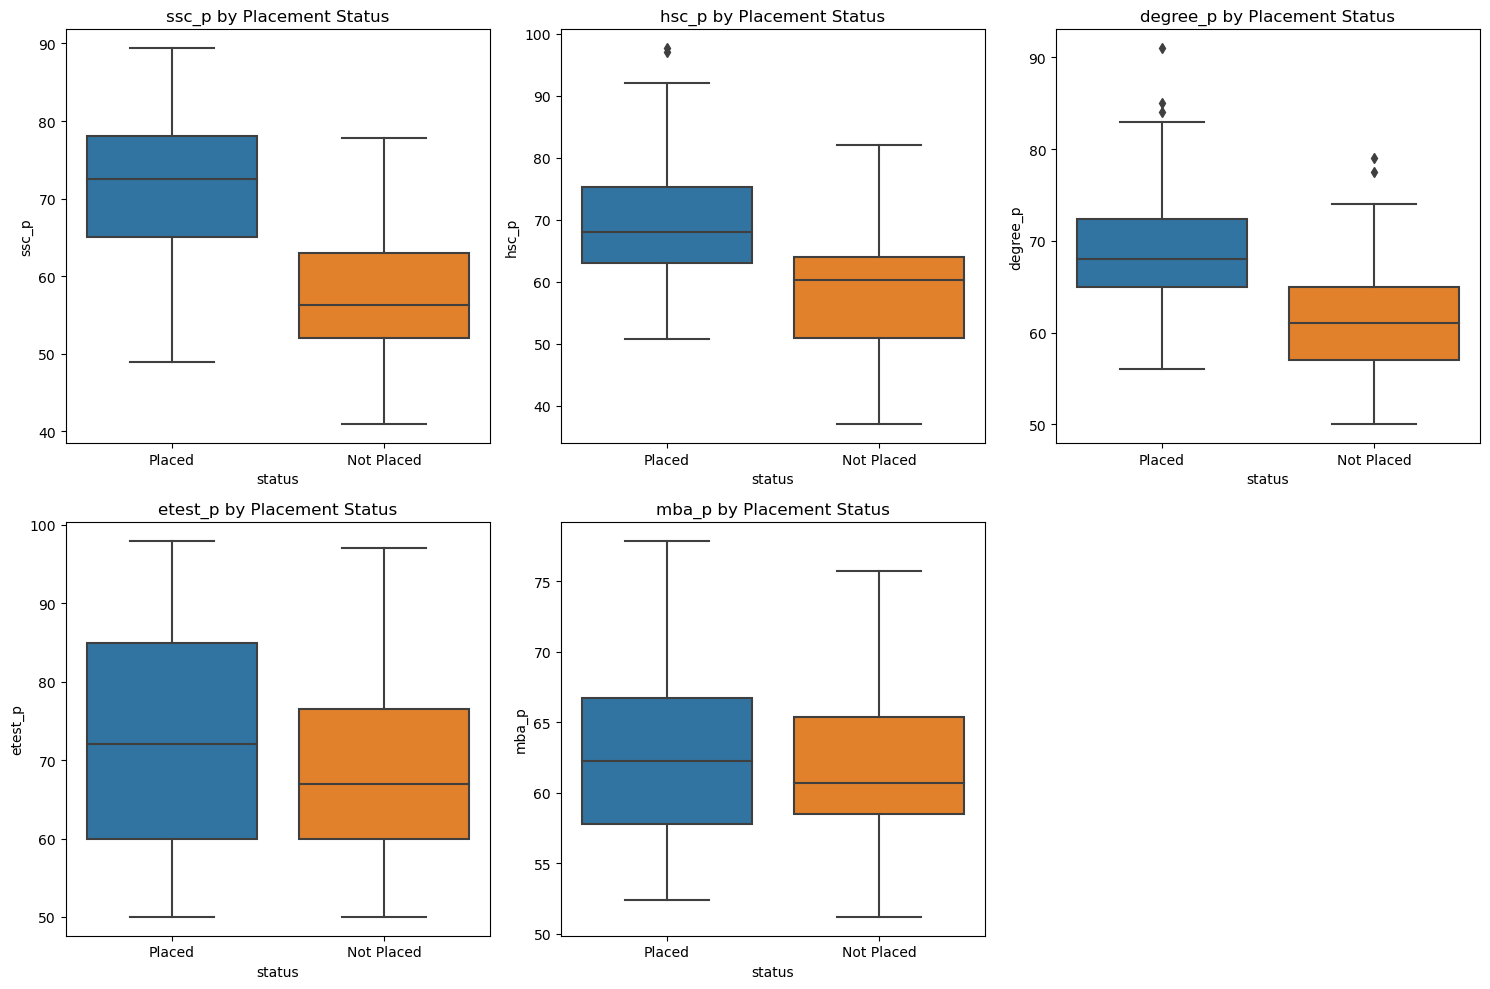

In [11]:
# Box plots for each feature by placement status
numeric_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=column, data=df)
    plt.title(f'{column} by Placement Status')
plt.tight_layout()
plt.show()

# Relationship Between Features

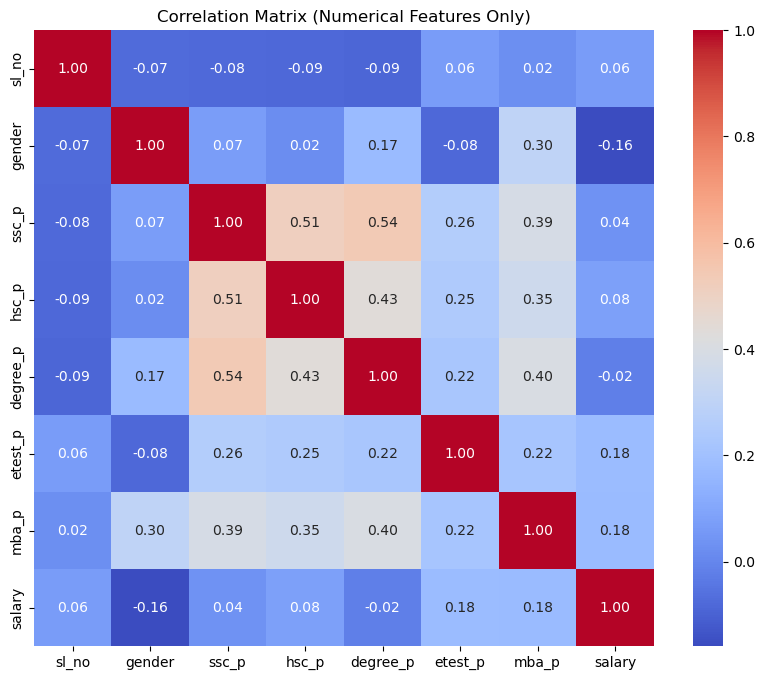

In [12]:
# Correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix on numerical data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

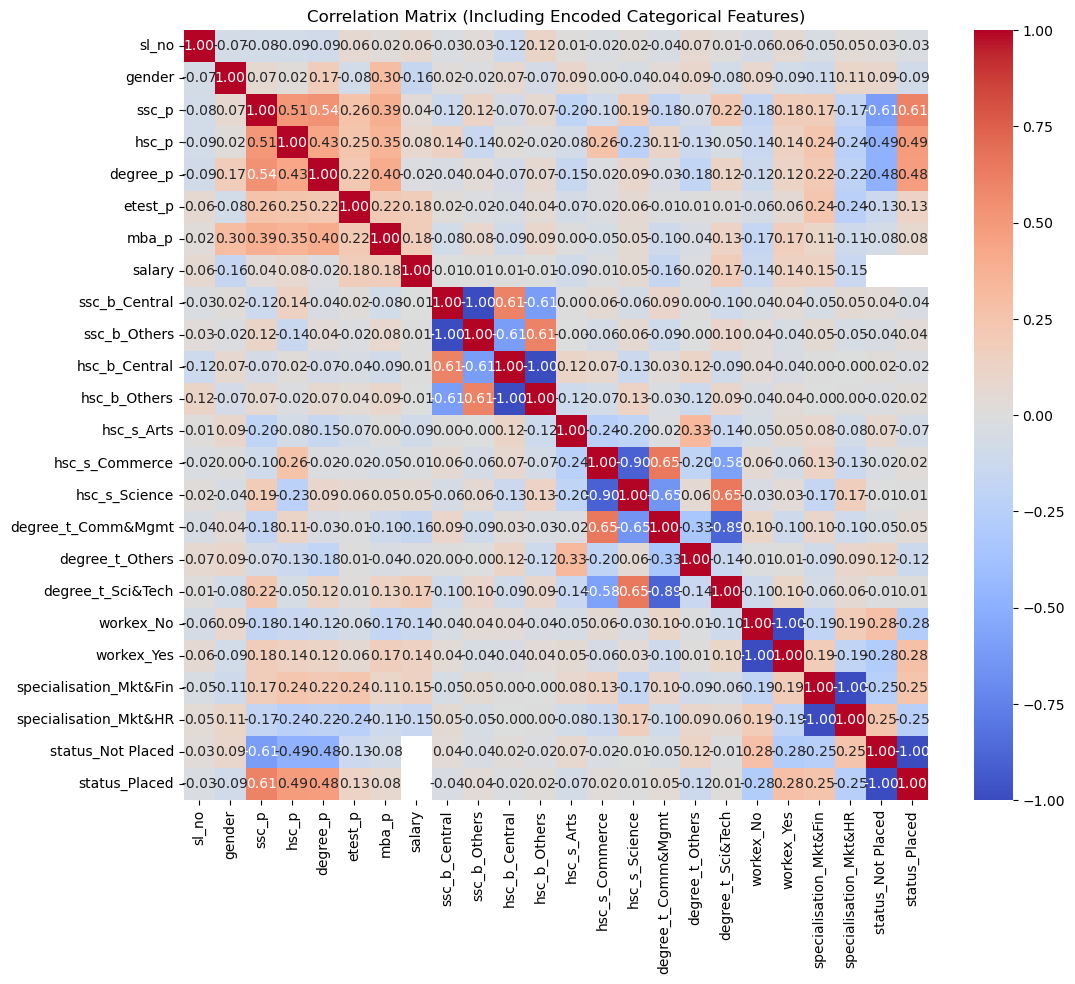

In [13]:
# Encode categorical columns
df_encoded = pd.get_dummies(df)

# Correlation matrix on encoded data
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including Encoded Categorical Features)')
plt.show()

In [14]:
# replace NaN with 0 in 'salary' column where status is 'Not Placed'
df.loc[df['status'] == 'Not Placed', 'salary'] = 0

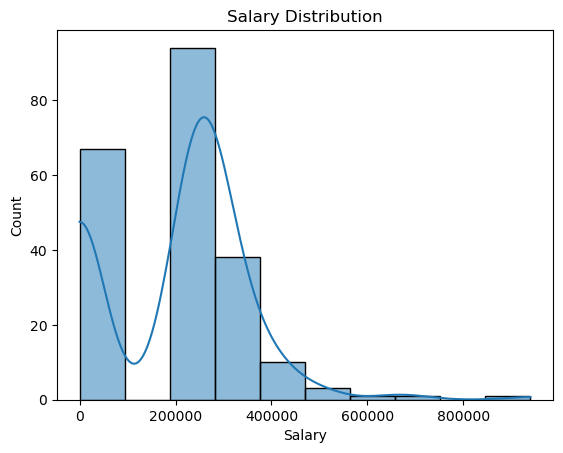

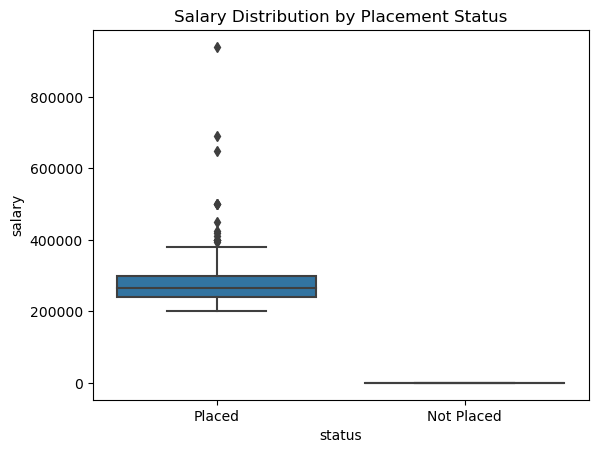

In [15]:
# Distribution of salary
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

# Box plot of salary by placement status
sns.boxplot(x='status', y='salary', data=df)
plt.title('Salary Distribution by Placement Status')
plt.show()

In [16]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [17]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [18]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [19]:
# Manual encoding
status_encoding = {'Placed': 1, 'Not Placed': 0}

In [20]:
df['status']=df['status'].map(status_encoding)

In [21]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1,204000.0


In [22]:
df['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [23]:
df['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [24]:
df['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [25]:
df['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [26]:
df['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [27]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

# Preparing the Target and Independent Variables

In [28]:
X=df.drop('status',axis=1)
y=df['status']

In [29]:
X

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0


In [30]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

# Preparing Pipelines for Categorical and Numerical Variables

In [31]:
# create my pipeline

num_cols=[col for col in X.columns if df[col].dtype !='O']
cat_cols=[col for col in X.columns if df[col].dtype =='O']

# define num_features_pipeline

num_pipeline= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# define cat_features_pipeline

cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first'))
])


preprocessor=ColumnTransformer(transformers=[
                               ('num',num_pipeline, num_cols),
                               ('cat',cat_pipeline, cat_cols)])


final_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor)

])

# Splitting Into Train and Test 70/30

In [32]:
# split into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
X_train.shape, y_train.shape

((150, 14), (150,))

In [34]:
X_test.shape, y_test.shape

((65, 14), (65,))

In [35]:
# X_train

In [36]:
# y_train

# Transformation

In [37]:
X_train_tr=final_pipeline.fit_transform(X_train)

X_test_tr=final_pipeline.transform(X_test)

In [38]:
X_train_tr.shape

(150, 16)

# Train Model - LogisticRegression

In [39]:
classifier = LogisticRegression()
classifier.fit(X_train_tr,y_train)


LogisticRegression()

In [40]:
classifier.predict_proba(X_train_tr)

array([[9.37040565e-01, 6.29594352e-02],
       [7.76326332e-01, 2.23673668e-01],
       [9.85205734e-01, 1.47942661e-02],
       [9.35318195e-01, 6.46818054e-02],
       [9.61727577e-01, 3.82724235e-02],
       [9.19435842e-01, 8.05641578e-02],
       [9.88842847e-01, 1.11571535e-02],
       [4.63834446e-03, 9.95361656e-01],
       [1.00964010e-03, 9.98990360e-01],
       [9.77992866e-01, 2.20071344e-02],
       [9.87609198e-01, 1.23908017e-02],
       [2.20687048e-03, 9.97793130e-01],
       [5.19822161e-02, 9.48017784e-01],
       [9.80934992e-01, 1.90650077e-02],
       [4.38460666e-02, 9.56153933e-01],
       [9.89778559e-01, 1.02214406e-02],
       [3.32533097e-02, 9.66746690e-01],
       [8.72679742e-01, 1.27320258e-01],
       [5.08010510e-03, 9.94919895e-01],
       [2.00810043e-03, 9.97991900e-01],
       [2.14657439e-02, 9.78534256e-01],
       [7.98397342e-03, 9.92016027e-01],
       [3.40327800e-03, 9.96596722e-01],
       [5.73023959e-03, 9.94269760e-01],
       [1.236376

In [41]:
# Train
y_pred_train=classifier.predict(X_train_tr)
print("confusion_matrix\n",confusion_matrix(y_pred_train,y_train))
print("\naccuracy_score",accuracy_score(y_pred_train,y_train))
print("\nclassification_report\n",classification_report(y_pred_train,y_train))

confusion_matrix
 [[ 46   0]
 [  0 104]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       104

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [42]:
# Prediction
y_pred=classifier.predict(X_test_tr)

In [43]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [44]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

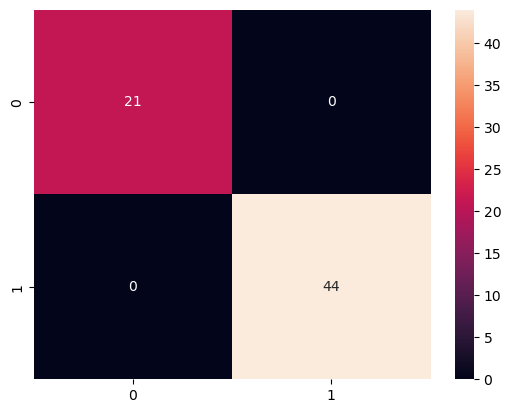

In [45]:
sns.heatmap(mat, annot=True)

# Hyperparameter Tuning - LogisticRegression

In [46]:
parameters={'penalty':('l1','l2','elasticnet',None),'C':[1,10,20]}

In [47]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [48]:
clf.fit(X_train_tr,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [49]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [50]:
classifier = clf.best_estimator_  # classifier=LogisticRegression(C=1,penalty='l2')

In [51]:
classifier.fit(X_train_tr,y_train)

LogisticRegression(C=1)

In [52]:
## Prediction
y_pred=classifier.predict(X_test_tr)


print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [53]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

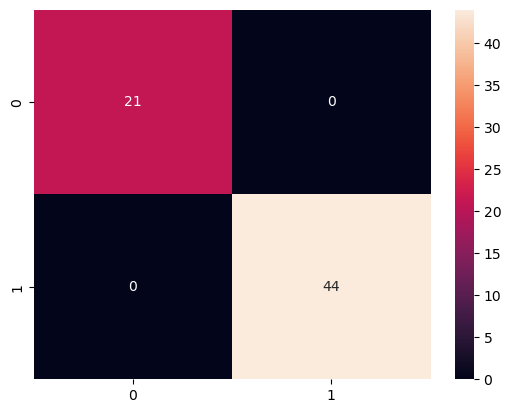

In [54]:
sns.heatmap(mat, annot=True)

# Train Model - Random Forest

In [55]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tr,y_train)

RandomForestClassifier(random_state=42)

In [56]:
rf.predict_proba(X_train_tr)

array([[0.88, 0.12],
       [0.88, 0.12],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.9 , 0.1 ],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.9 , 0.1 ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.95, 0.05],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.96, 0.04],
       [0.02,

In [57]:
# Train
y_pred_train=rf.predict(X_train_tr)
print("confusion_matrix\n",confusion_matrix(y_pred_train,y_train))
print("\naccuracy_score",accuracy_score(y_pred_train,y_train))
print("\nclassification_report\n",classification_report(y_pred_train,y_train))

confusion_matrix
 [[ 46   0]
 [  0 104]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       104

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [58]:
# Prediction
y_pred=rf.predict(X_test_tr)

In [59]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [60]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

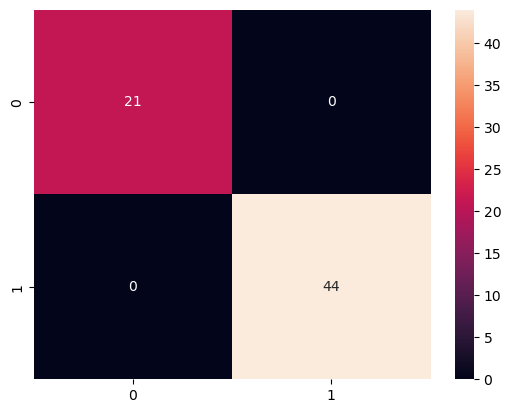

In [61]:
sns.heatmap(mat, annot=True)

# Hyperparameter Tuning - Random Forest

In [62]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [63]:
rf_grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [64]:
rf_grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [65]:
rf_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [66]:
rf = rf_grid_search.best_estimator_

In [67]:
rf.fit(X_train_tr,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [68]:
## Prediction
y_pred=rf.predict(X_test_tr)


print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [69]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

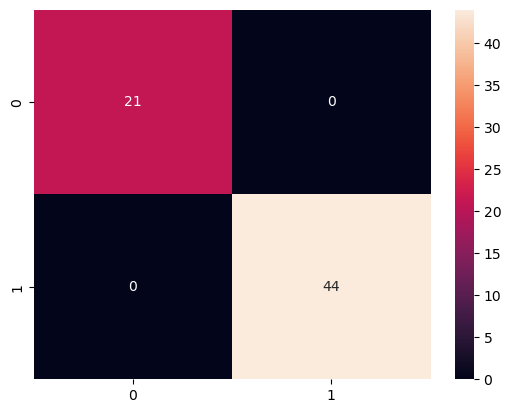

In [70]:
sns.heatmap(mat, annot=True)

# Train Model - XGBClassifier

In [71]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tr,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [72]:
xgb.predict_proba(X_train_tr)

array([[0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.98023856, 0.01976143],
       [0.98023856, 0.01976143],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.98023856, 0.01976143],
       [0.00862718, 0.9913728 ],
       [0.98023856, 0.01976143],
       [0.00862718, 0.9913728 ],
       [0.98023856, 0.01976143],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.98023856, 0.01976143],
       [0.00862718, 0.9913728 ],
       [0.00862718, 0.9913728 ],
       [0.

In [73]:
# Train
y_pred_train=xgb.predict(X_train_tr)
print("confusion_matrix\n",confusion_matrix(y_pred_train,y_train))
print("\naccuracy_score",accuracy_score(y_pred_train,y_train))
print("\nclassification_report\n",classification_report(y_pred_train,y_train))

confusion_matrix
 [[ 46   0]
 [  0 104]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       104

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [74]:
# Prediction
y_pred=xgb.predict(X_test_tr)

In [75]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [76]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

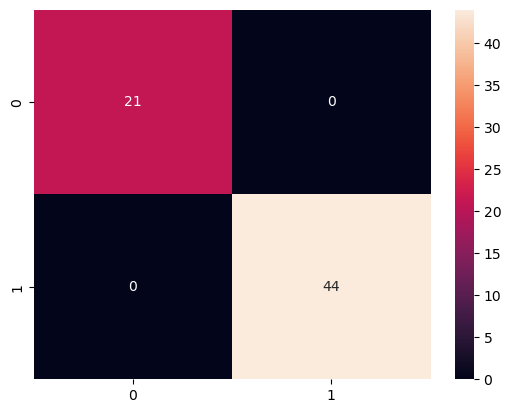

In [77]:
sns.heatmap(mat, annot=True)

# Hyperparameter Tuning - XGBClassifier

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [79]:
xgb_search = GridSearchCV( xgb, param_grid=param_grid,cv=5)

In [80]:
xgb_search.fit(X_train_tr,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]})

In [81]:
xgb_search.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.6}

In [82]:
xgb = xgb_search.best_estimator_ 

In [83]:
xgb.fit(X_train_tr,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [84]:
## Prediction
y_pred=xgb.predict(X_test_tr)


print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [85]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

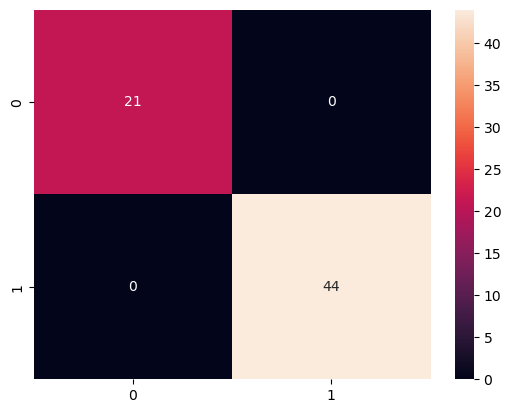

In [86]:
sns.heatmap(mat, annot=True)

# Train Model using Voting Classifier

In [87]:
# create technique for voting classifier

classifier_models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'KNN':KNeighborsClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'XgBoost':XGBClassifier()
}

estimator=[]
for name,model in classifier_models.items():
    estimator.append((name,model))



vc_model=VotingClassifier(estimators=estimator, weights=[1,1,1,1,1,1,1])

vc_model.fit(X_train_tr,y_train)



VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('SVC', SVC()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('AdaBoost', AdaBoostClassifier()),
                             ('XgBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 weights=[1, 1, 1, 1, 1, 1, 1])

In [88]:
y_pred=vc_model.predict(X_test_tr)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [89]:
y_test.value_counts()

status
1    44
0    21
Name: count, dtype: int64

In [90]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [91]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

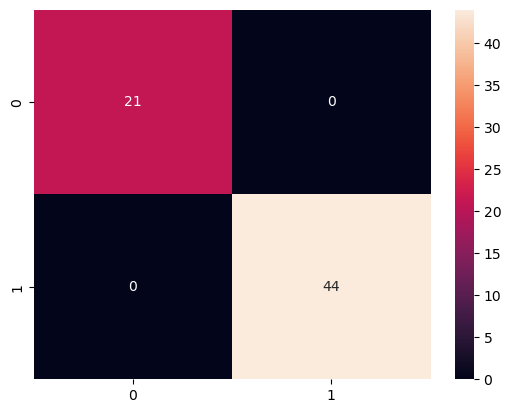

In [92]:
sns.heatmap(mat, annot=True)

# Train Model using Stacking Classifier

In [93]:
# import StackingClassifier 

from sklearn.ensemble import StackingClassifier


In [94]:
# stacking classifier

estimator=[]
for name,model in classifier_models.items():
    estimator.append((name,model))

stacking_model=StackingClassifier(estimators=estimator, final_estimator=LogisticRegression())

stacking_model.fit(X_train_tr,y_train)

StackingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                               ('SVC', SVC()),
                               ('DecisionTree', DecisionTreeClassifier()),
                               ('RandomForest', RandomForestClassifier()),
                               ('KNN', KNeighborsClassifier()),
                               ('AdaBoost', AdaBoostClassifier()),
                               ('XgBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=Non...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [95]:
y_pred=stacking_model.predict(X_test_tr)

In [96]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("\naccuracy_score",accuracy_score(y_pred,y_test))
print("\nclassification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[21  0]
 [ 0 44]]

accuracy_score 1.0

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [97]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[21,  0],
       [ 0, 44]], dtype=int64)

<Axes: >

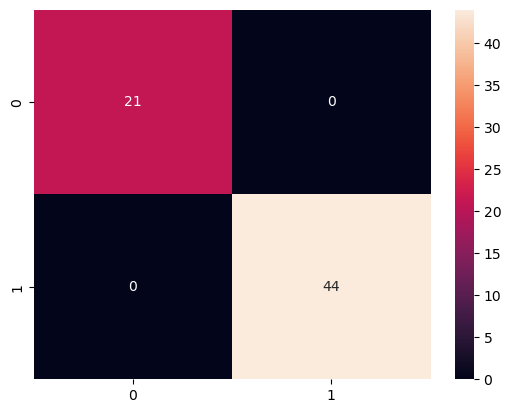

In [98]:
sns.heatmap(mat, annot=True)